In [265]:
#Importing modules
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [266]:
#Loading the data
df= pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [268]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [269]:
#finding the missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [270]:
#fill the missing values for numerical terms- mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [271]:
#fill the missing values for categorical terms- mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [272]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Explotary Data Analysis

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

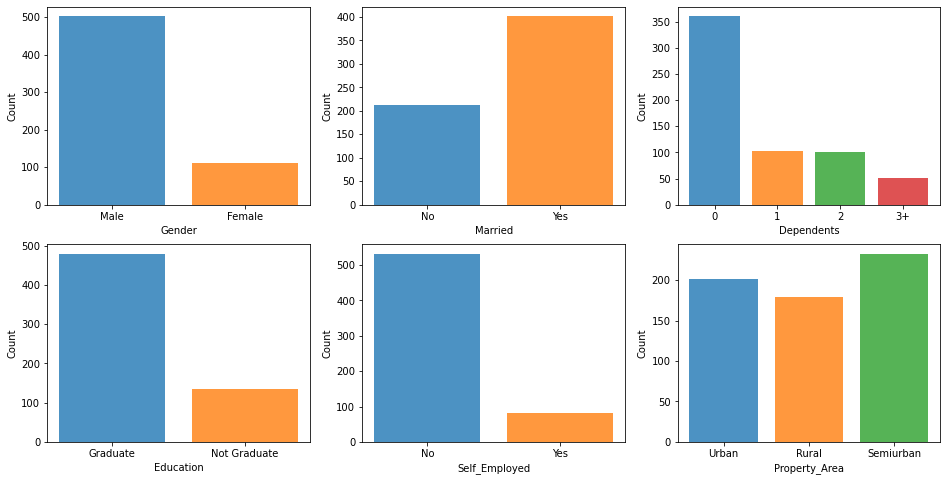

In [273]:
#Categorical attributes visualization
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(16,8))            
sns.histplot(data=df, x="Gender",hue="Gender", shrink=.8, alpha=.8, legend=False, ax=axs[0,0],edgecolor='none')
sns.histplot(data=df, x="Married",hue="Married", shrink=.8, alpha=.8, legend=False, ax=axs[0,1],edgecolor='none')
sns.histplot(data=df, x="Dependents",hue="Dependents", shrink=.8, alpha=.8, legend=False, ax=axs[0,2],edgecolor='none')
sns.histplot(data=df, x="Education",hue="Education", shrink=.8, alpha=.8, legend=False, ax=axs[1,0],edgecolor='none')
sns.histplot(data=df, x="Self_Employed",hue="Self_Employed", shrink=.8, alpha=.8, legend=False, ax=axs[1,1],edgecolor='none')
sns.histplot(data=df, x="Property_Area",hue="Property_Area", shrink=.8, alpha=.8, legend=False, ax=axs[1,2],edgecolor='none')


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

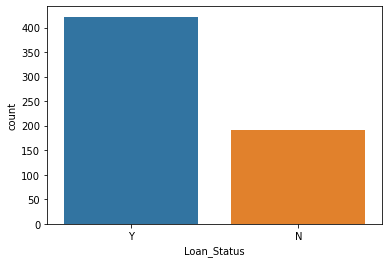

In [274]:
sns.countplot(df["Loan_Status"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

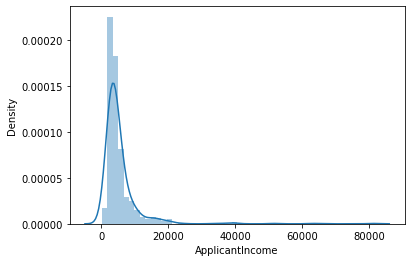

In [275]:
# numerical attributes visualization
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

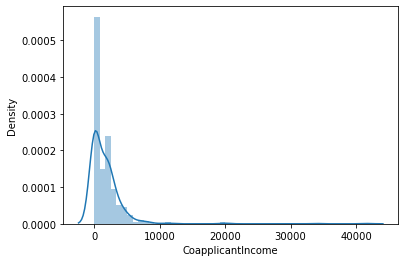

In [276]:
sns.distplot(df["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

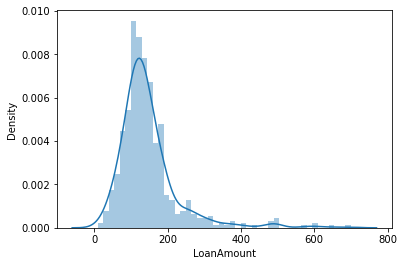

In [277]:
sns.distplot(df["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

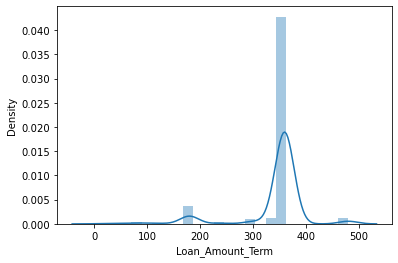

In [278]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

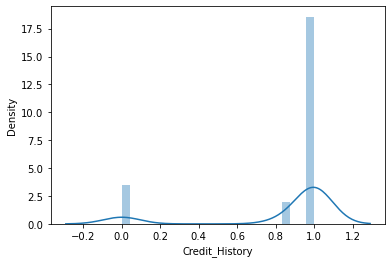

In [279]:
sns.distplot(df['Credit_History'])

### Creation of new attributes

In [280]:
# total income
df['TotalIncome']= df['ApplicantIncome']+ df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Log Transformation

In [281]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','TotalIncome']:
    df[col]=np.log(1+df[col])

In [282]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,0.693147,Urban,Y,8.674197
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y,8.505525
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y,8.699681


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

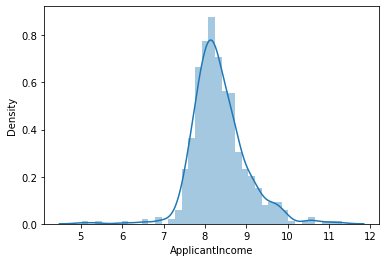

In [283]:
sns.distplot(df['ApplicantIncome'])

### Coorelation Matrix

<AxesSubplot:>

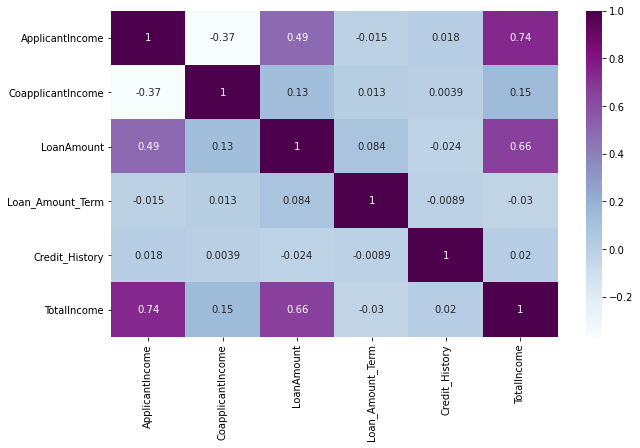

In [284]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [285]:
# drop unnecessary columns
col=['Loan_ID']
df=df.drop(columns=col, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,0.693147,Urban,Y,8.674197
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N,8.714732
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y,8.006701
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y,8.505525
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y,8.699681


### Label Encoding

In [296]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  TotalIncome        614 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 62.5 KB


### Train-Test Split

In [298]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.30, random_state=1)

### Model Training

In [300]:

scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)

rf= RandomForestClassifier(max_depth= 10, max_features= 3)
rf.fit(X_train_tr, y_train)
rf.score(X_train_tr, y_train)

0.951048951048951

In [301]:
y_pred = rf.predict(X_test)

### Confusion Matrix

<AxesSubplot:>

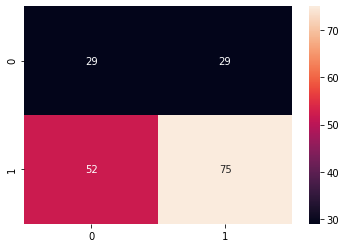

In [302]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [303]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.358025,0.500000,0.417266,58.000000
1,0.721154,0.590551,0.649351,127.000000
accuracy,0.562162,0.562162,0.562162,0.562162
macro avg,0.539589,0.545276,0.533308,185.000000
weighted avg,0.607308,0.562162,0.576589,185.000000
